In [55]:
import open3d as o3d
import numpy as np

## Reading in file
## Conversion to PCD code: https://stackoverflow.com/a/61771198/11826878

def read_file(file):
    pc_bin = np.fromfile(file, '<f4') # Reading in the coordinates as floats
    pc_bin = pc_bin.reshape((-1, 4))
    pc_bin = pc_bin[:, :3] # Only taking the X, Y, and Z coordinates
    o3d_pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pc_bin)) # Converting to Open3D point cloud format
    return o3d_pcd

file = 'training/velodyne/000091.bin'
points = read_file(file)


In [56]:
def remove_statistical_outliers(points):
    return points.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)

def remove_radius_outliers(points):
    return points.remove_radius_outlier(nb_points=4, radius=0.005)

def uniform_subsample(points, freq):
    return points.uniform_down_sample(every_k_points=freq)

In [57]:
_, ind = remove_statistical_outliers(points)

In [58]:
def view_(points, ind):
    inlier_pcd = points.select_by_index(ind)
    outlier_pcd = points.select_by_index(ind, invert=True)

    # outlier_pcd.paint_uniform_color([1, 0, 0])
    # inlier_pcd.paint_uniform_color([0.8, 0.8, 0.8])


    # o3d.visualization.draw_geometries([inlier_pcd])
    return inlier_pcd


In [59]:
viewPoints=view_(points, ind)

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [61]:
x = np.asarray(viewPoints.points)

In [62]:
lidar_points = x

# Number of clusters
k = 7

# KMeans clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(lidar_points)
labels = kmeans.predict(lidar_points)
centroids = kmeans.cluster_centers_



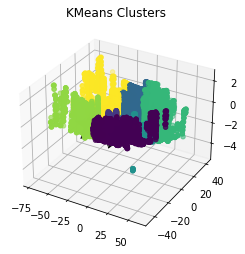

In [63]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lidar_points[:, 0], lidar_points[:, 1], lidar_points[:, 2], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='#050505', s=1000)
plt.title('KMeans Clusters')
plt.show()

In [64]:
# Color the points based on cluster labels
colors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [0, 1, 1],[0.5,0.5,0.5],[0.5,0,0],[0.5,0,1],[0.5,0.5,1]])  # Red, Green, Blue, Yellow, Cyan
color_map = colors[labels]




In [65]:
# Assign colors back to the original point cloud
viewPoints.colors = o3d.utility.Vector3dVector(color_map)


In [66]:
# Create an Open3D point cloud for centroids
centroid_cloud = o3d.geometry.PointCloud()
centroid_cloud.points = o3d.utility.Vector3dVector(centroids)
centroid_cloud.colors = o3d.utility.Vector3dVector(np.array([[0, 0, 0] for _ in range(len(centroids))]))  # Black color for centroids




In [67]:
# Visualize the result
# o3d.visualization.draw_geometries([viewPoints, centroid_cloud], window_name="Clustered Point Cloud")


In [68]:
# lets try with DBSCAN

from dbscan import DBSCAN

In [69]:
labels, core_samples_mask = DBSCAN(lidar_points, eps=0.5, min_samples=5)

In [70]:
len(set(labels))

369

In [ ]:
# gmm
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5)
gmm.fit(lidar_points)
labels=gmm.predict(lidar_points)

In [73]:
# Color the points based on cluster labels
colors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [0, 1, 1],[0.5,0.5,0.5],[0.5,0,0],[0.5,0,1],[0.5,0.5,1]])  # Red, Green, Blue, Yellow, Cyan
color_map = colors[labels]




In [74]:
# Assign colors back to the original point cloud
viewPoints.colors = o3d.utility.Vector3dVector(color_map)


In [75]:
# Create an Open3D point cloud for centroids
centroid_cloud = o3d.geometry.PointCloud()
centroid_cloud.points = o3d.utility.Vector3dVector(centroids)
centroid_cloud.colors = o3d.utility.Vector3dVector(np.array([[0, 0, 0] for _ in range(len(centroids))]))  # Black color for centroids




In [76]:
# Visualize the result
o3d.visualization.draw_geometries([viewPoints, centroid_cloud], window_name="Clustered Point Cloud")


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


: 